In [5]:
import torch

from Dataset import Dataset
import utils
import transforms as T

from PIL import Image, ImageDraw as D
import torchvision.transforms as trans
from torch.nn import MSELoss

import matplotlib.pyplot as plt
import numpy as np

In [6]:
num_to_display = 3

labelConverter = {
    0 : 'pedestrian',
    1 : 'rider',
    2 : 'car',
    3 : 'truck',
    4 : 'bus',
    5 : 'train',
    6 : 'motorcycle',
    7 : 'bicycle',
    8 :'traffic light',
    9 : 'traffic sign'
}

def get_transform(train):
    transforms = []
    transforms.append(T.PILToTensor())
    transforms.append(T.ConvertImageDtype(torch.float))
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

model = torch.load('../out/transfer0.pt')
model.eval()

dataset_test = Dataset('../Data/raw/val', get_transform(train=False))

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=False, num_workers=4,
    collate_fn=utils.collate_fn)

transform = trans.ToPILImage()

Loaded 10000 images with labels for ../Data/raw/val


#### Input Dataset

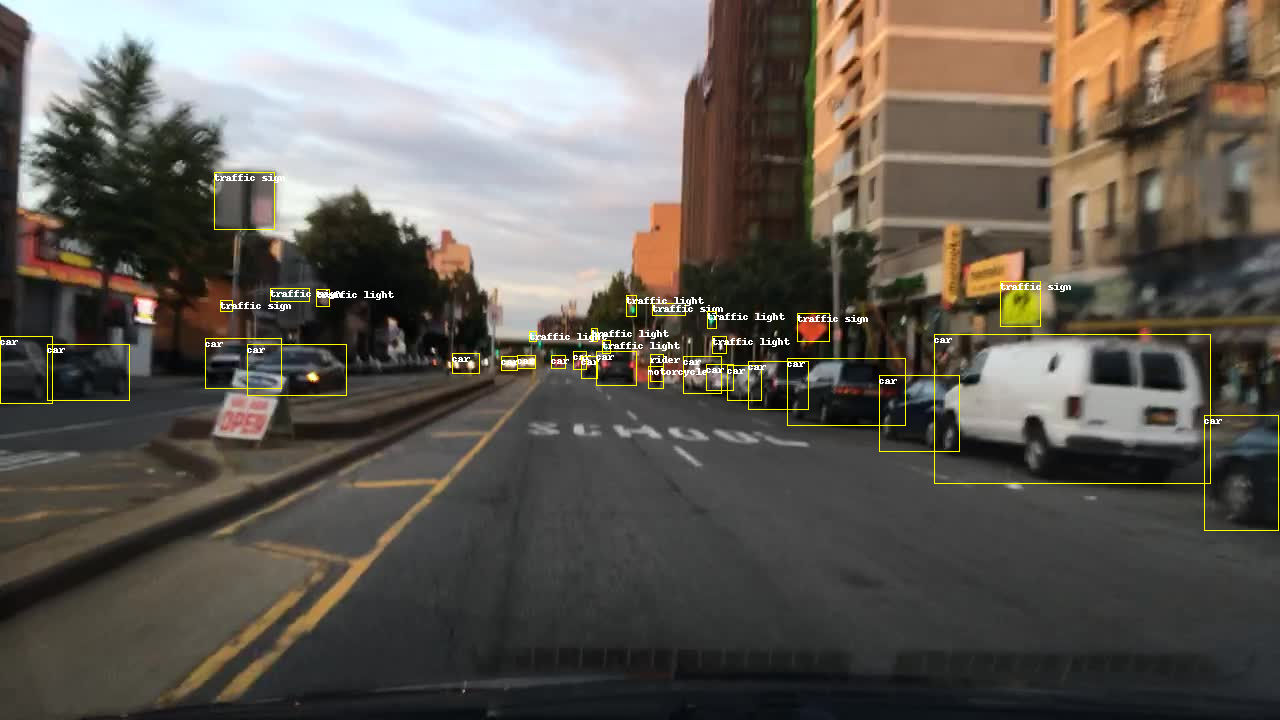

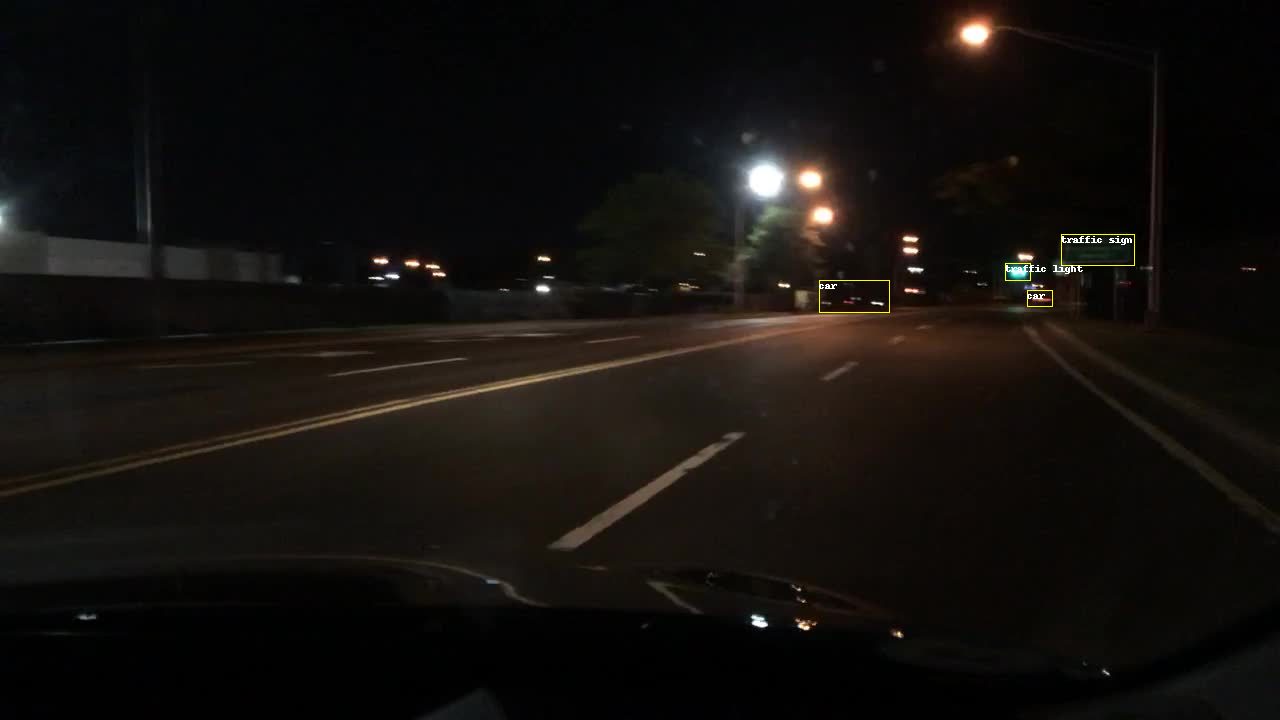

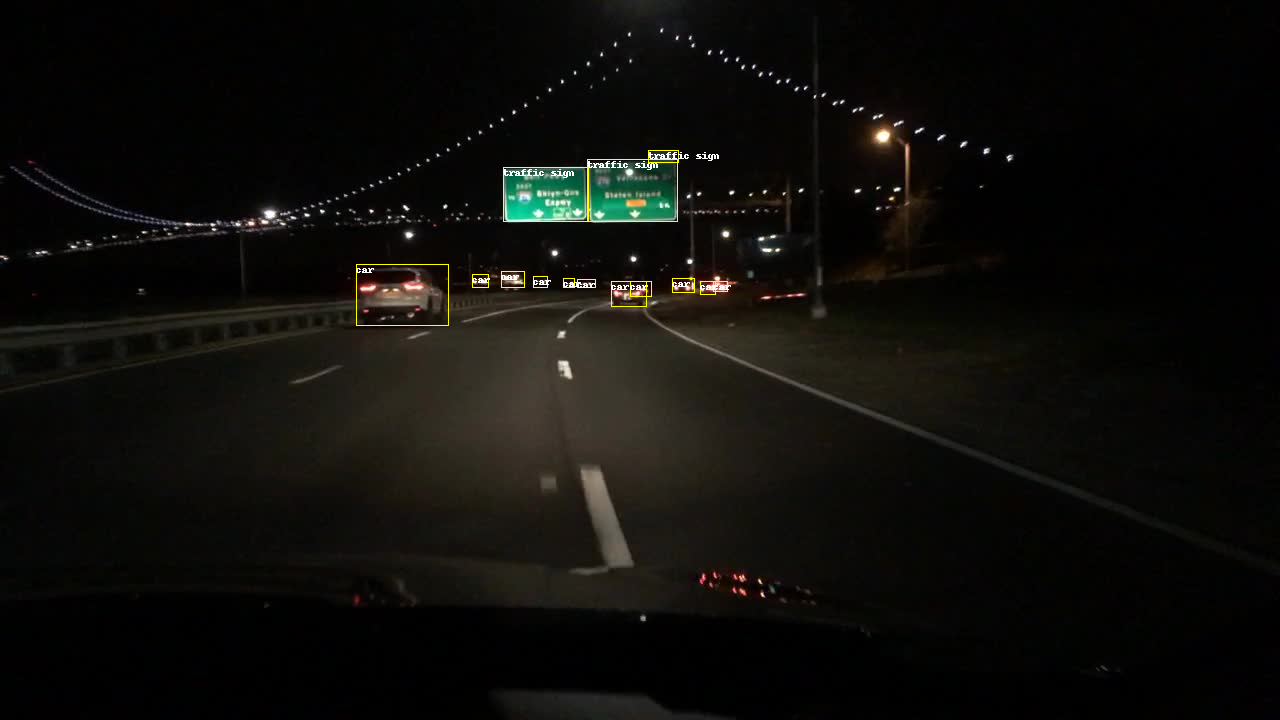

In [7]:
for index, data in enumerate(data_loader_test):
    images, labels = data
    images = list(img.cuda() for img in images)
    targets = [{k: v.cuda() for k, v in t.items()} for t in labels]

    img = transform(images[0])

    boxes = targets[0].get('boxes').tolist()
    draw = D.Draw(img)

    for idx, box in enumerate(boxes):
        label = labelConverter.get(targets[0].get('labels').tolist()[idx])
        draw.rectangle(box, outline="yellow")
        draw.text(box[:2], label)

    display(img)

    if index >= num_to_display-1:
        break

#### Transfer Learning

In [58]:
import json
from torch.autograd import Variable


correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
# with torch.no_grad():


eval_output = []

for index, data in enumerate(data_loader_test):
    images, labels = data
    images = list(img.cuda() for img in images)
    targets = [{k: v.cuda() for k, v in t.items()} for t in labels]

    # calculate outputs by running images through the network
    outputs = model(images, labels)


    output_dict = {}
    # output_dict['name'] =

    boxes = outputs[0].get('boxes').tolist()


    img = transform(images[0])

    draw = D.Draw(img)

    predicted_results = {}

    image_id = int(targets[0].get('image_id').tolist()[0])

    predicted_results['name'] = image_id
    predicted_results['labels'] = []

    for idx, box in enumerate(boxes):
        label = labelConverter.get(outputs[0].get('labels').tolist()[idx])
        draw.rectangle(box, outline="red")
        draw.text(box[:2], label)
        score = outputs[0].get('scores').tolist()[idx]




    #     label_dict = {}
    #     label_dict['id'] = image_id
    #     label_dict['category'] = label
    #     label_dict['score'] = score
    #     label_dict['box2d'] = {'x1':box[0],
    #                            'y1':box[1],
    #                            'x2':box[2],
    #                            'y2':box[3]}
    #     predicted_results['labels'].append(label_dict)
    # eval_output.append(predicted_results)

        if score < 0.6:
            break

    # print(f'labels: {labels[0].get("boxes").tolist()}')
    # print(f'Predicted: {outputs[0].get("boxes").tolist()}')

    # lossOutput = loss(outputs[0].get("boxes"), labels[0].get("boxes"))

    # print(f'BBox MSELoss: {lossOutput.backward()}')

    # Lets match up some damn boxes
    matches = []
    mselosses = []
    numcorrect = len(labels[0].get('boxes').tolist())
    for idx, actual_bbox in enumerate(labels[0].get("boxes").tolist()):
        actual_label = labels[0].get('labels').tolist()[idx]
        pred_label = 99
        closest = [np.inf, np.inf, np.inf, np.inf]
        match = [0,0,0,0]
        for idx2, pred_bbox in enumerate(outputs[0].get("boxes").tolist()):
            comparison = list(map(abs, np.subtract(actual_bbox, pred_bbox)))
            if sum(comparison) < sum(closest):
                closest = comparison
                match = pred_bbox
                pred_label = outputs[0].get('labels').tolist()[idx2]
        zeros = [0,0,0,0]
        if match != zeros:
            matches.append(match)
            loss = list(np.square(np.subtract(actual_bbox, match)))
            mselosses.append(loss)
            if actual_label != pred_label:
                numcorrect -= 1
            # print(f'match found for {actual_bbox}: {match}')
            # print(f'Label: {actual_label}, predicted: {pred_label}')
            # print(f'Loss: {loss}')

    print(f'Percent accuracy: {numcorrect/len(labels[0].get("boxes").tolist())}')
    print(f'average loss: {np.mean(mselosses)}')
    display(img)



    if index >= num_to_display-1:
        break
#     print(f'{index}/{len(data_loader_test)}')
#
#
# with open('../out/Faster R-CNN Transfer.json', 'w') as f:
#     json.dump(eval_output, f, indent=4)

0/10000
1/10000
2/10000
3/10000
4/10000
5/10000
6/10000
7/10000
8/10000
9/10000
10/10000
11/10000
12/10000
13/10000
14/10000
15/10000
16/10000
17/10000
18/10000
19/10000
20/10000
21/10000
22/10000
23/10000
24/10000
25/10000
26/10000
27/10000
28/10000
29/10000
30/10000
31/10000
32/10000
33/10000
34/10000
35/10000
36/10000
37/10000
38/10000
39/10000
40/10000
41/10000
42/10000
43/10000
44/10000
45/10000
46/10000
47/10000
48/10000
49/10000
50/10000
51/10000
52/10000
53/10000
54/10000
55/10000
56/10000
57/10000
58/10000
59/10000
60/10000
61/10000
62/10000
63/10000
64/10000
65/10000
66/10000
67/10000
68/10000
69/10000
70/10000
71/10000
72/10000
73/10000
74/10000
75/10000
76/10000
77/10000
78/10000
79/10000
80/10000
81/10000
82/10000
83/10000
84/10000
85/10000
86/10000
87/10000
88/10000
89/10000
90/10000
91/10000
92/10000
93/10000
94/10000
95/10000
96/10000
97/10000
98/10000
99/10000
100/10000
101/10000
102/10000
103/10000
104/10000
105/10000
106/10000
107/10000
108/10000
109/10000
110/10000


In [53]:
with open('../out/Faster R-CNN Transfer.JSON', 'r') as f:
    print(len(json.load(f)))

10000


#### Faster RCNN resnet50

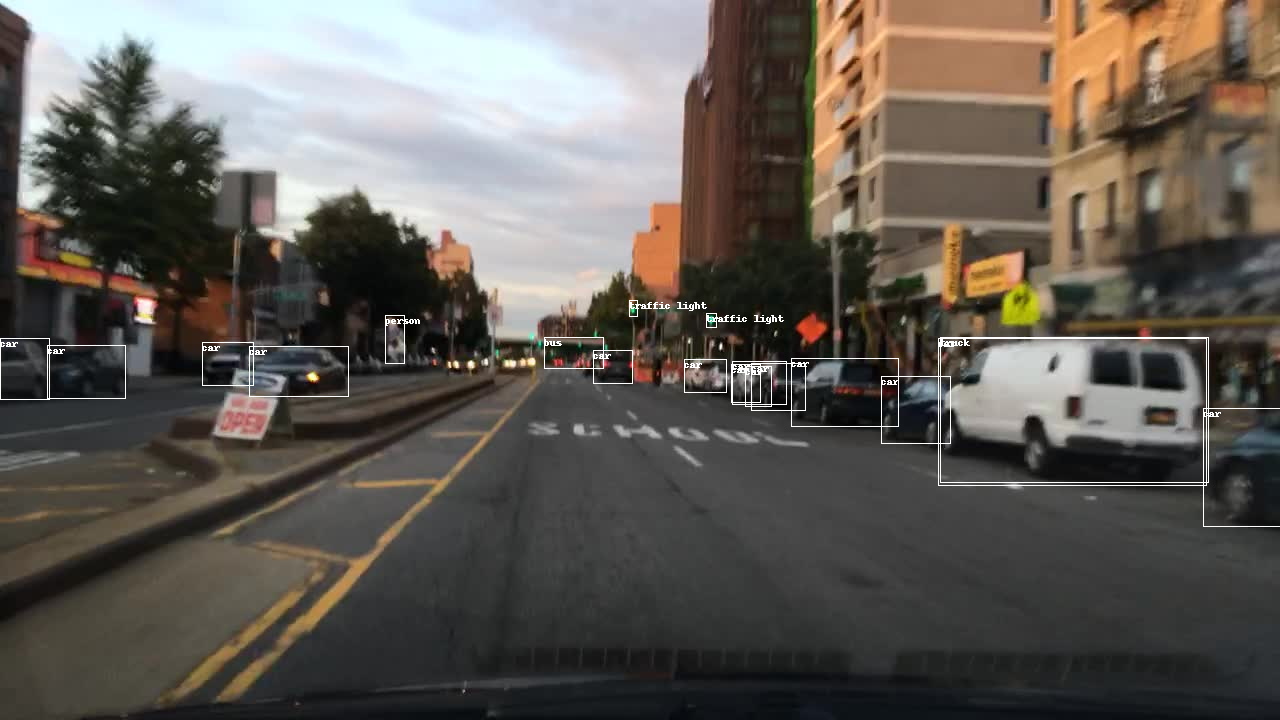

0


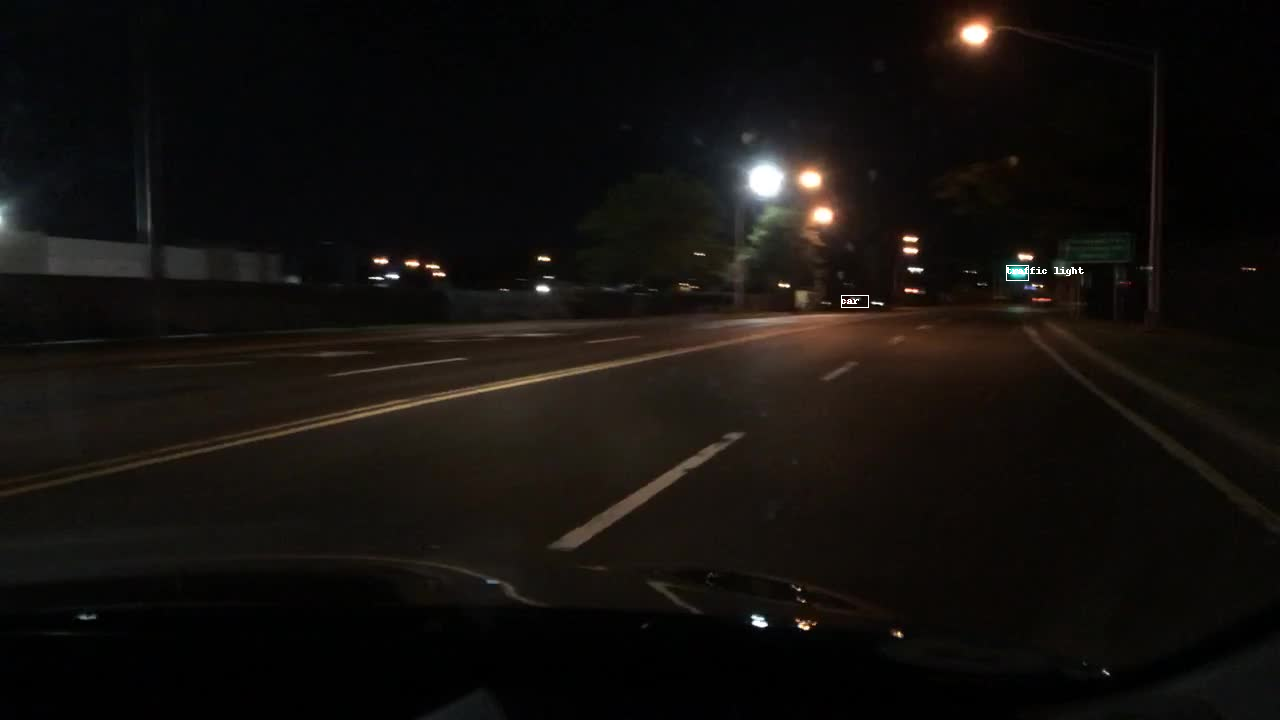

1


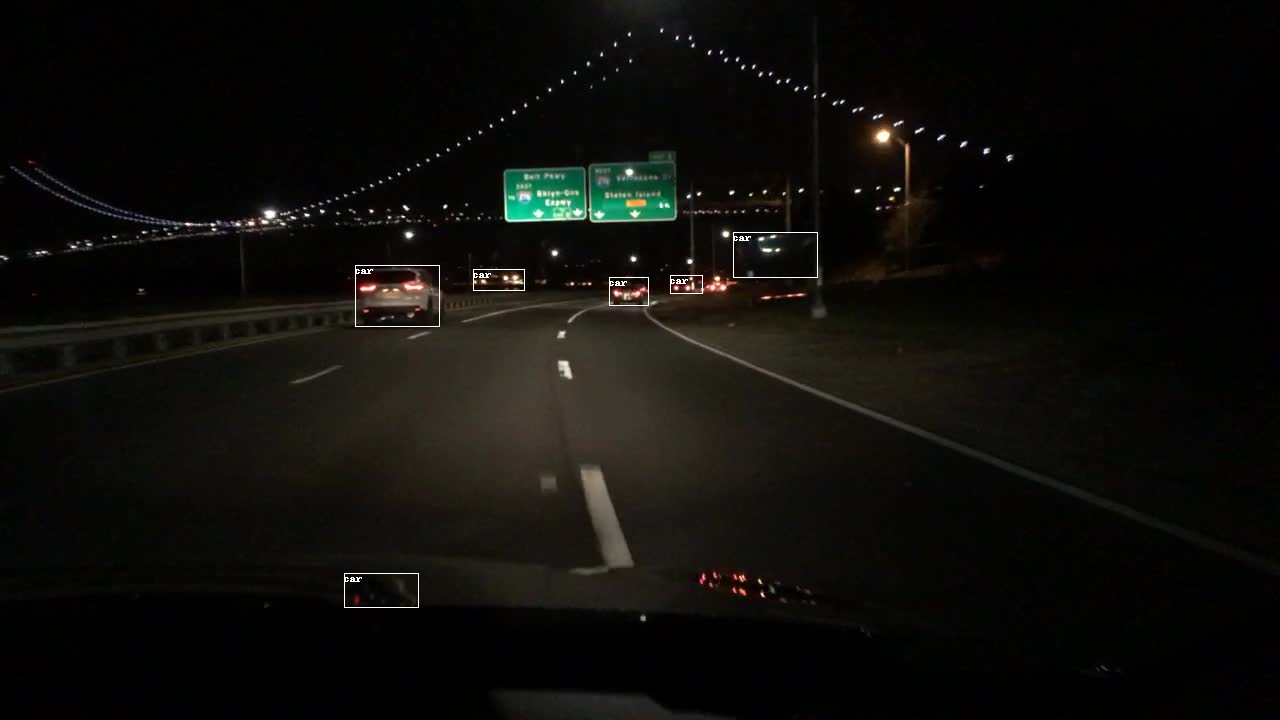

2


In [9]:
import torchvision

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

COCO_label_converter = {i : val for i, val in enumerate(COCO_INSTANCE_CATEGORY_NAMES)}

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT", pretrained=True)
model.eval()

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():

    for index, data in enumerate(data_loader_test):
        images, labels = data
        # images = list(img.cuda() for img in images)
        targets = [{k: v.cuda() for k, v in t.items()} for t in labels]

        # calculate outputs by running images through the network
        outputs = model(images, labels)

        boxes = outputs[0].get('boxes').tolist()

        transform = trans.ToPILImage()
        img = transform(images[0])

        draw = D.Draw(img)

        for idx, box in enumerate(boxes):
            label = COCO_label_converter.get(outputs[0].get('labels').tolist()[idx])
            draw.rectangle(box, outline="white")
            draw.text(box[:2], label)
            score = outputs[0].get('scores').tolist()[idx]
            if score < 0.6:
                break
        print(f'Percent accuracy: {numcorrect/len(labels[0].get("boxes").tolist())}')

        display(img)
        print(index)
        if index >= num_to_display-1:
            break

#### Single Shot MultiBox Detector (SSD)

Percent accuracy: 0.7352941176470589
average loss: 252.80770800524206


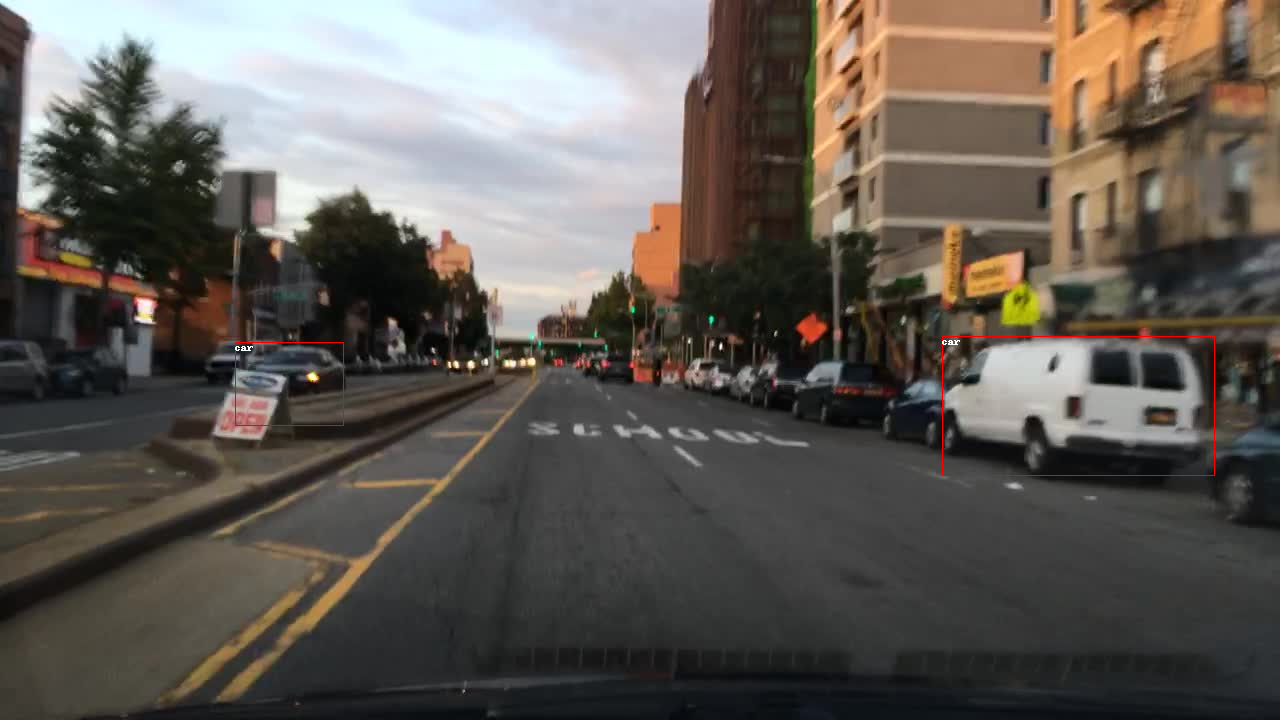

Percent accuracy: 1.0
average loss: 481.0477235043945


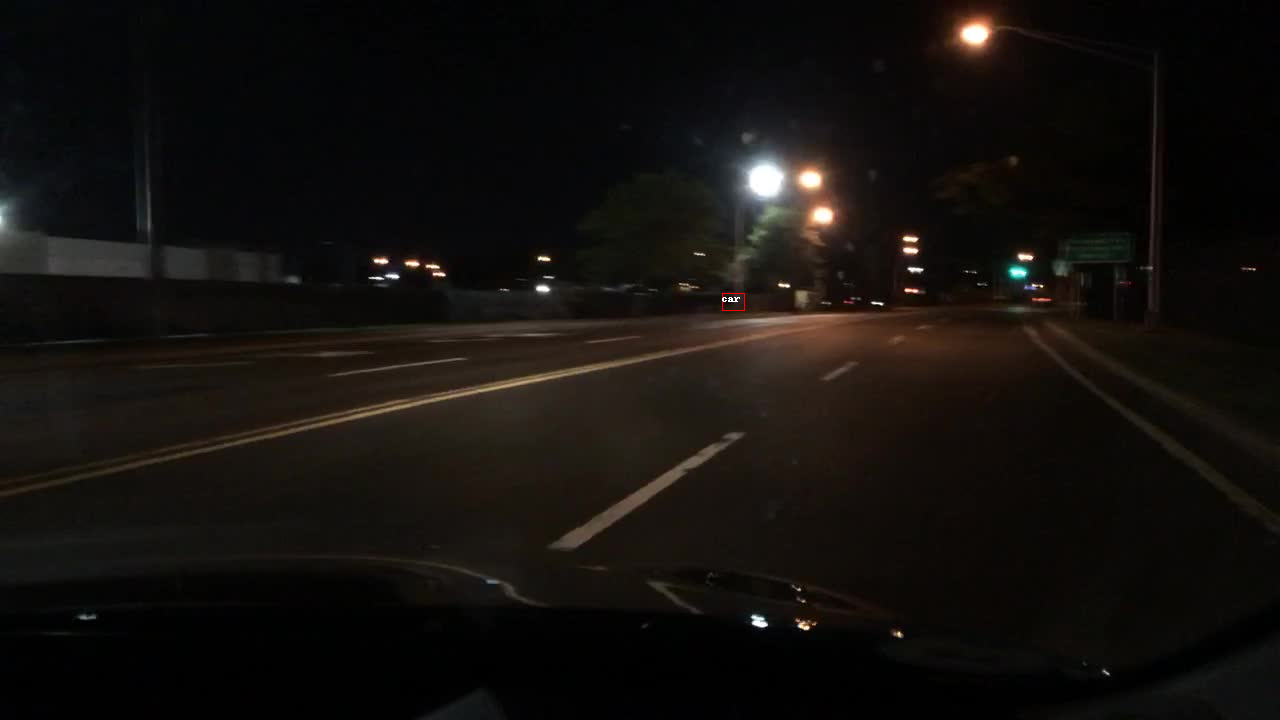

Percent accuracy: 1.0
average loss: 169.81983553633992


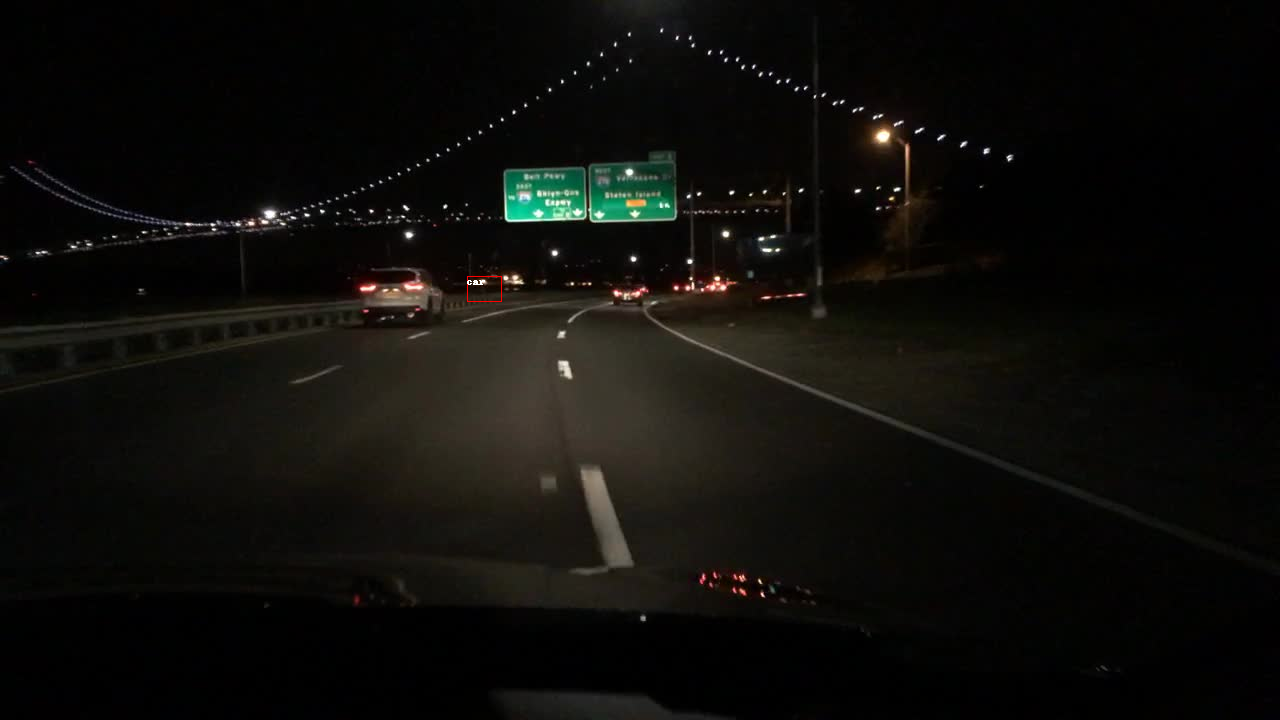

In [10]:
correct = 0
total = 0

model = torch.load('../out/SSD.pt')
model.eval()

# since we're not training, we don't need to calculate the gradients for our outputs
# with torch.no_grad():
for index, data in enumerate(data_loader_test):
    images, labels = data
    images = list(img.cuda() for img in images)
    targets = [{k: v.cuda() for k, v in t.items()} for t in labels]

    # calculate outputs by running images through the network
    outputs = model(images, labels)

    boxes = outputs[0].get('boxes').tolist()

    img = transform(images[0])

    draw = D.Draw(img)

    for idx, box in enumerate(boxes):
        label = labelConverter.get(outputs[0].get('labels').tolist()[idx])
        draw.rectangle(box, outline="red")
        draw.text(box[:2], label)
        score = outputs[0].get('scores').tolist()[idx]
        if score < 0.6:
            break

    # print(f'labels: {labels[0].get("boxes").tolist()}')
    # print(f'Predicted: {outputs[0].get("boxes").tolist()}')

    # lossOutput = loss(outputs[0].get("boxes"), labels[0].get("boxes"))

    # print(f'BBox MSELoss: {lossOutput.backward()}')

    # Lets match up some damn boxes
    matches = []
    mselosses = []
    numcorrect = 0
    for idx, actual_bbox in enumerate(labels[0].get("boxes").tolist()):
        actual_label = labels[0].get('labels').tolist()[idx]
        pred_label = 99
        closest = [np.inf, np.inf, np.inf, np.inf]
        match = [0,0,0,0]
        for idx2, pred_bbox in enumerate(outputs[0].get("boxes").tolist()):
            comparison = list(map(abs, np.subtract(actual_bbox, pred_bbox)))
            if sum(comparison) < sum(closest):
                closest = comparison
                match = pred_bbox
                pred_label = outputs[0].get('labels').tolist()[idx2]
        zeros = [0,0,0,0]
        if match != zeros:
            matches.append(match)
            loss = list(np.square(np.subtract(actual_bbox, match)))
            mselosses.append(loss)
            if actual_label == pred_label:
                numcorrect += 1
            # print(f'match found for {actual_bbox}: {match}')
            # print(f'Label: {actual_label}, predicted: {pred_label}')
            # print(f'Loss: {loss}')

    print(f'Percent accuracy: {numcorrect/len(labels[0].get("boxes").tolist())}')
    print(f'average loss: {np.mean(mselosses)}')
    display(img)



    if index >= num_to_display-1:
        break

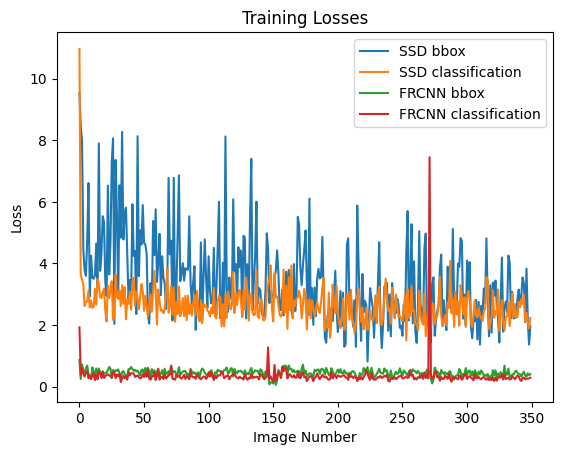

In [38]:
import csv
import pickle

with open('SSD_losses.JSON', 'rb') as rb:
    file = pickle.load(rb)

bbox = [item.get('bbox_regression').tolist() for item in file]
classification = [item.get('classification').tolist() for item in file]
indexes = [index for index, item in enumerate(bbox)]

with open('../out/Faster R-CNN Classification Training Loss.csv', 'r') as f:
    RCNNClass = list(csv.reader(f))

with open('../out/Faster R-CNN BBox Training Loss.csv', 'r') as f:
    RCNNbbox = list(csv.reader(f))

RCNNbbox = [float(item[0]) for item in RCNNbbox]
RCNNClass = [float(item[0]) for item in RCNNClass]

plt.plot(indexes, bbox, label='SSD bbox')
plt.plot(indexes, classification, label='SSD classification')
plt.plot(indexes, RCNNbbox, label='FRCNN bbox')
plt.plot(indexes, RCNNClass, label='FRCNN classification')
plt.legend()
plt.xlabel('Image Number')
plt.ylabel('Loss')
plt.title('Training Losses')
plt.show()